In [135]:
import numpy as np
import matplotlib.pyplot as plt


[1.0, 1.1, 1.2100000000000002, 1.3310000000000004, 1.4641000000000004, 1.6105100000000006, 1.7715610000000008]


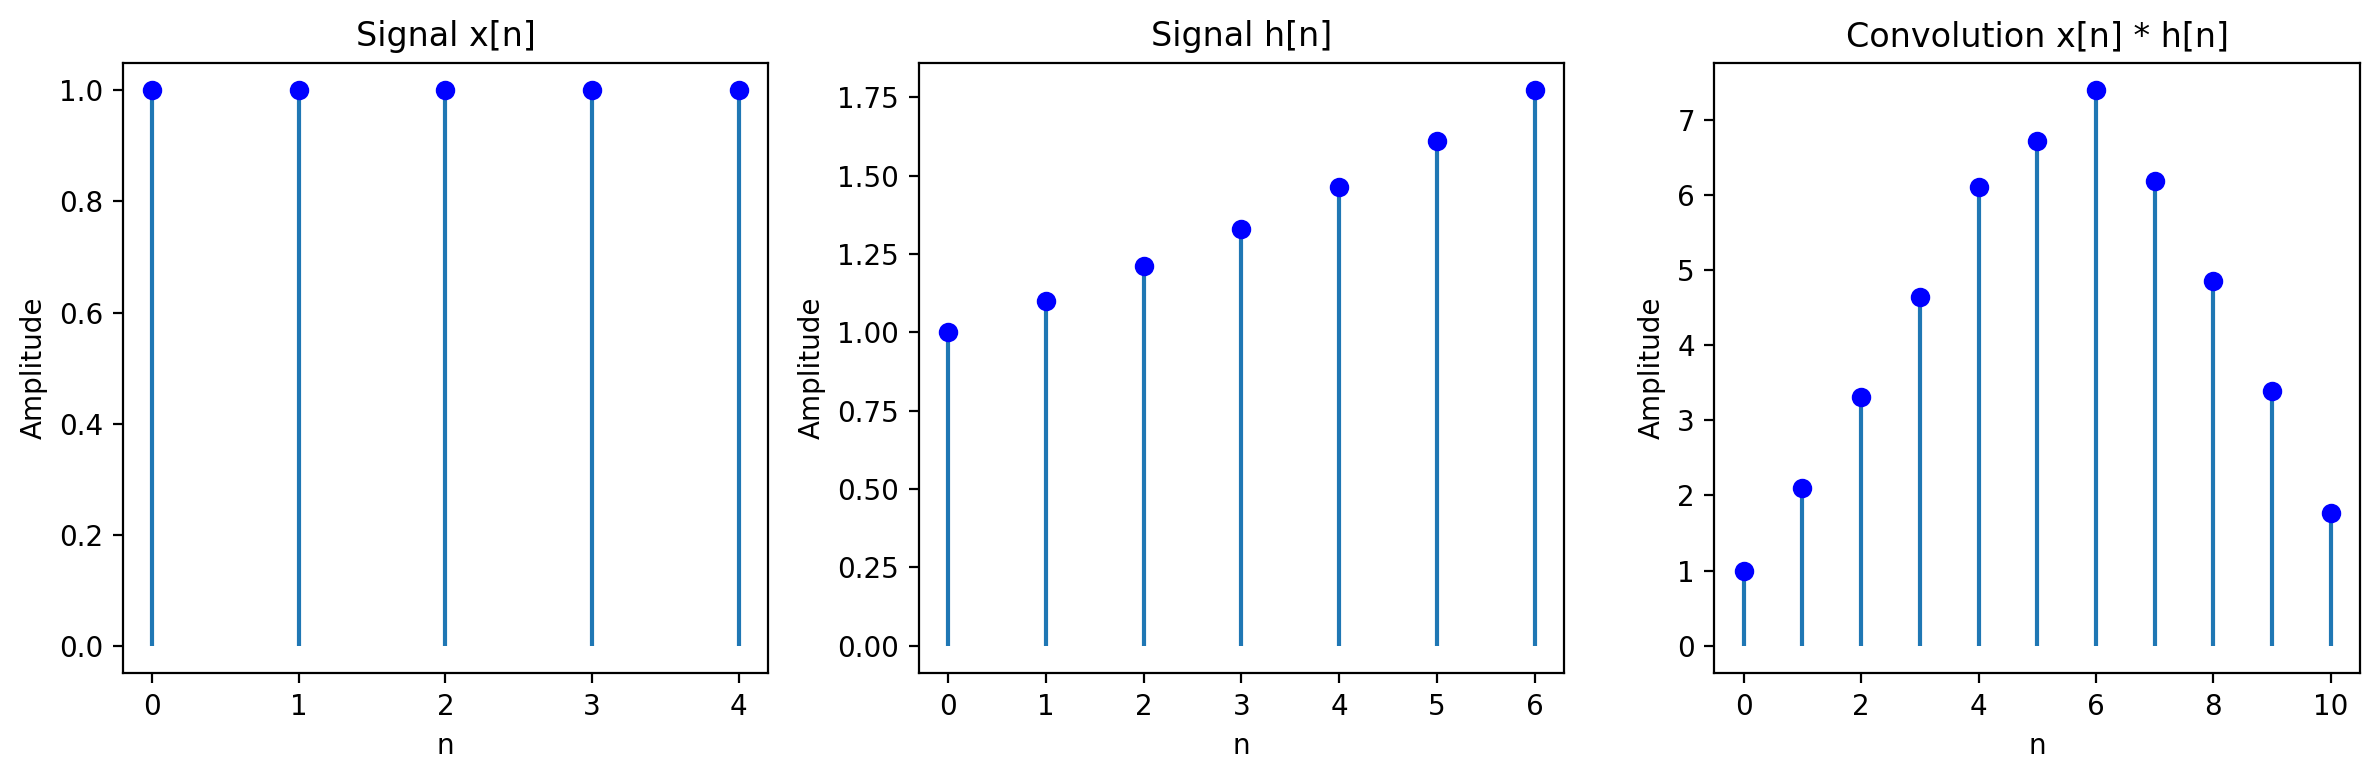

In [136]:
# Define the signals x[n] and h[n]
x = np.ones(5)
y = [1.1 ** n for n in np.arange(0, 7)]
print(y)
# Plot x[n] and h[n]
plt.figure(figsize=(12, 4),dpi=200)
plt.subplot(1, 3, 1)
plt.stem(range(len(x)), x,  markerfmt='bo', basefmt=' ')
plt.title('Signal x[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.subplot(1, 3, 2)
plt.stem(range(len(y)), y,  markerfmt='bo', basefmt=' ')
plt.title('Signal h[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')

# Convolve x[n] and y[n]
y = np.convolve(x, y)

# Plot x[n] * y[n]
plt.subplot(1, 3, 3)
plt.stem(range(len(y)), y,  markerfmt='bo', basefmt=' ')
plt.title('Convolution x[n] * h[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.savefig('convolution1.png')
plt.show()

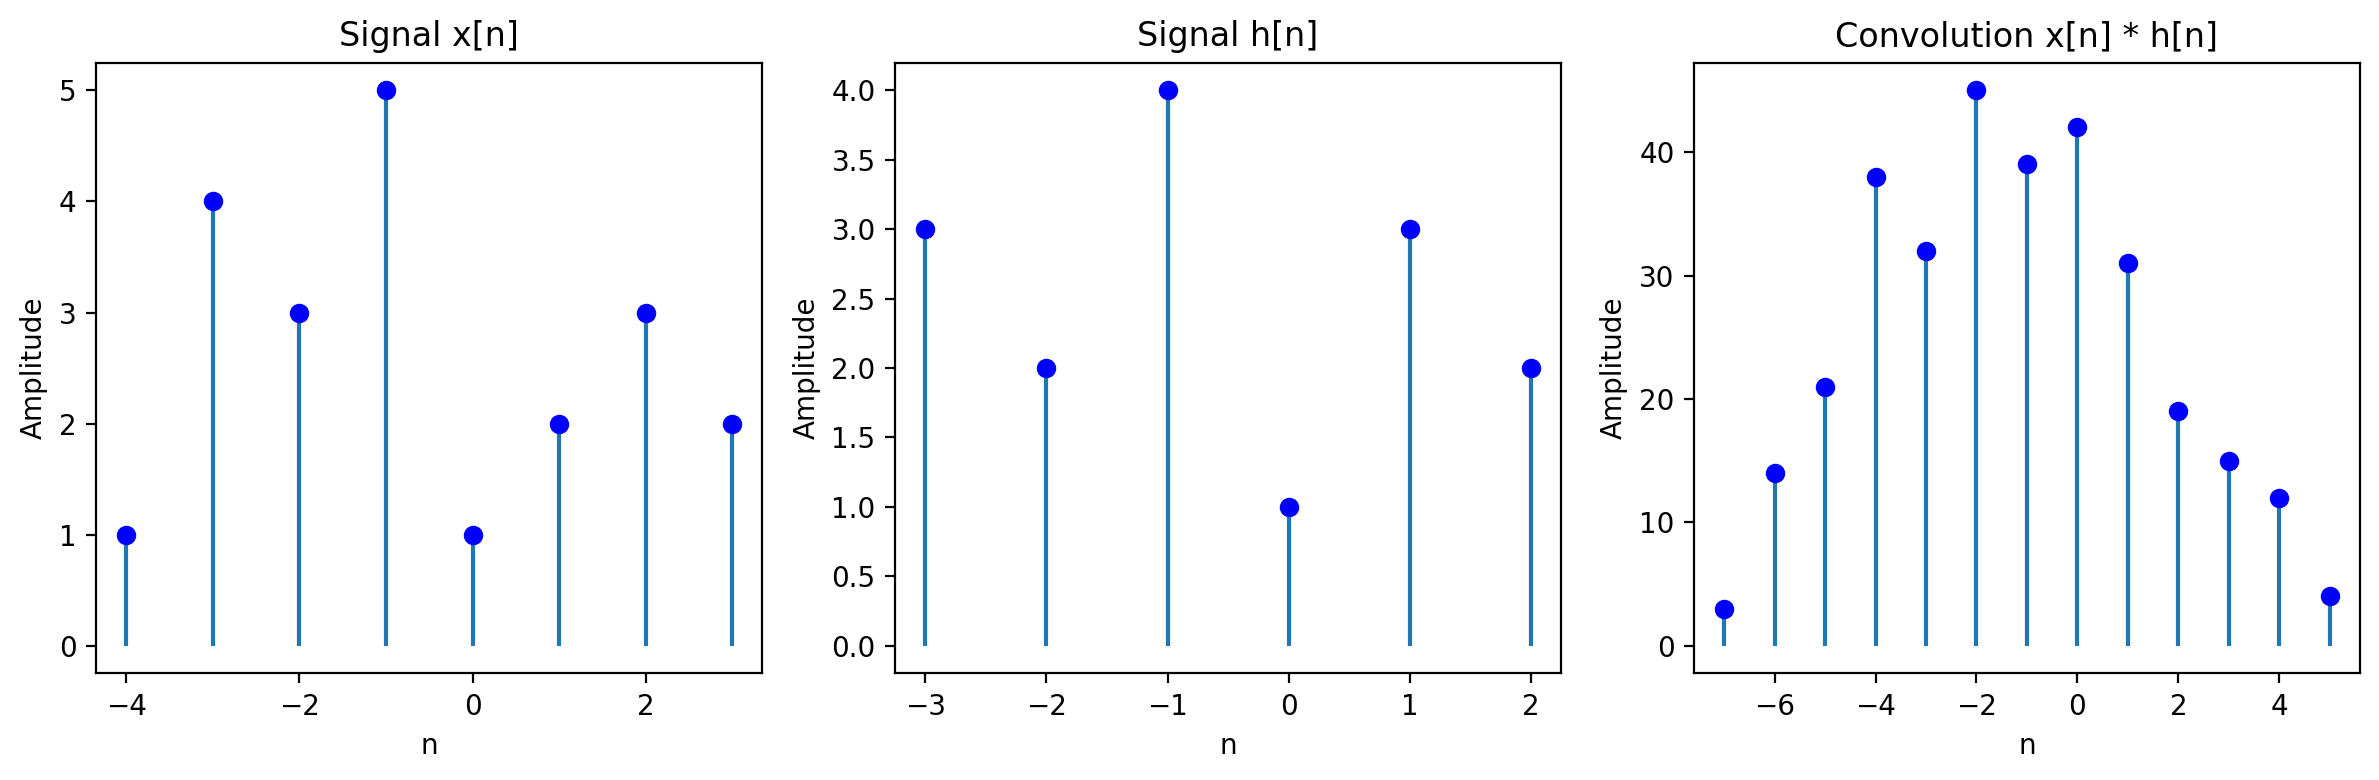

In [137]:
import numpy as np
import matplotlib.pyplot as plt

# Define the signals x[n] and h[n]
x = np.array([1, 4, 3, 5, 1, 2, 3, 2])
h = np.array([3, 2, 4, 1, 3, 2])

# Plot x[n] and h[n]
plt.figure(figsize=(12, 4),dpi=200)
plt.subplot(1, 3, 1)
plt.stem(range(-4, 4), x,  markerfmt='bo', basefmt=' ')
plt.title('Signal x[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.subplot(1, 3, 2)
plt.stem(range(-3, 3), h,  markerfmt='bo', basefmt=' ')
plt.title('Signal h[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')


y = np.convolve(x, h, mode='full')


plt.subplot(1, 3, 3)
plt.stem(range(-7, 6), y,  markerfmt='bo', basefmt=' ')
plt.title('Convolution x[n] * h[n]')
plt.xlabel('n')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.savefig('convolution2.png')
plt.show()


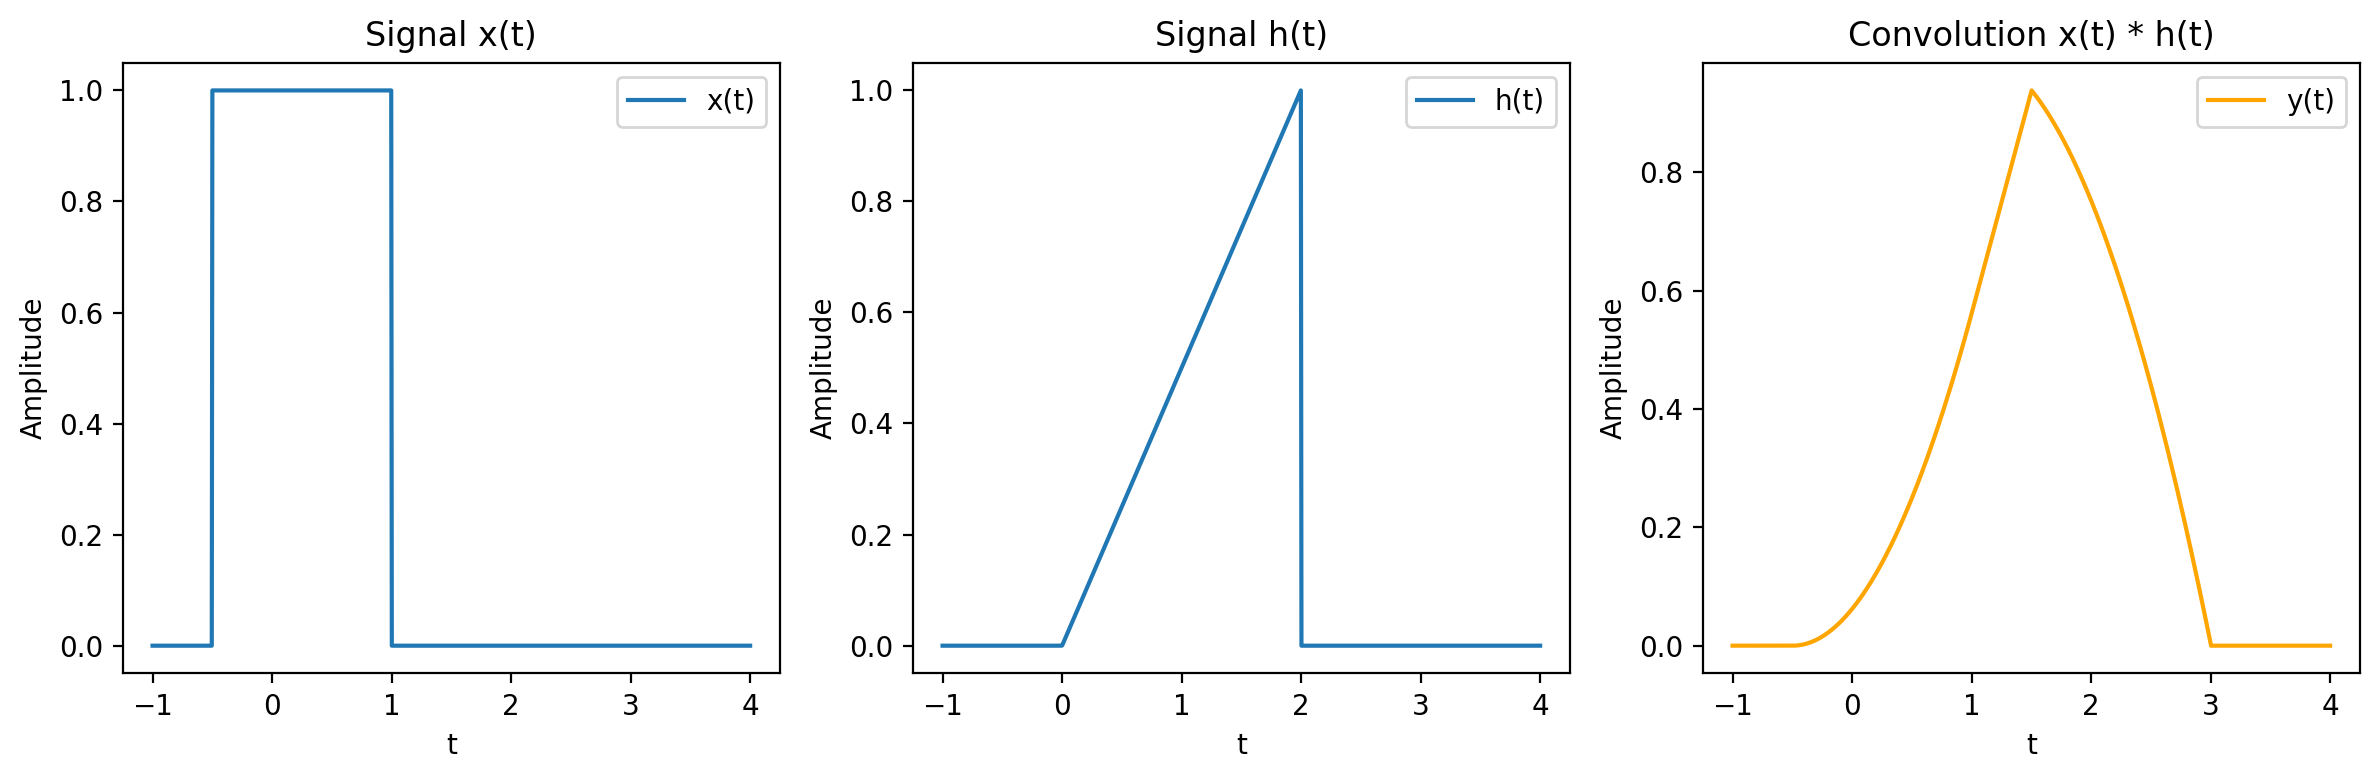

In [138]:
import numpy as np
import matplotlib.pyplot as plt

# Define the signals x(t) and h(t)
t = np.linspace(-1, 4, 1000)
x = np.where((t >= -0.5) & (t <= 1), 1, 0)
h = np.where((t >= 0) & (t <= 2), 0.5*t, 0)

# Convolve x(t) and h(t) and truncate the result
y = np.convolve(x, h, mode='full')[199:1199] * (t[1] - t[0])  # Scale the result

# Plot x(t), h(t), and the convolution result y(t)
plt.figure(figsize=(12, 4),dpi=200)
plt.subplot(1, 3, 1)
plt.plot(t, x, label='x(t)')
plt.title('Signal x(t)')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(1, 3, 2)
plt.plot(t, h, label='h(t)')
plt.title('Signal h(t)')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(t, y, label='y(t)', color='orange')
plt.title('Convolution x(t) * h(t)')
plt.xlabel('t')
plt.ylabel('Amplitude')
plt.legend()

plt.tight_layout()
plt.savefig('convolution3.png')
plt.show()


C:\Users\Carl\AppData\Local\Temp\ipykernel_29432\1705968580.py:63: ComplexWarning: Casting complex values to real discards the imaginary part
  column_N2[i] = column_N1[i] * column_N1[i]


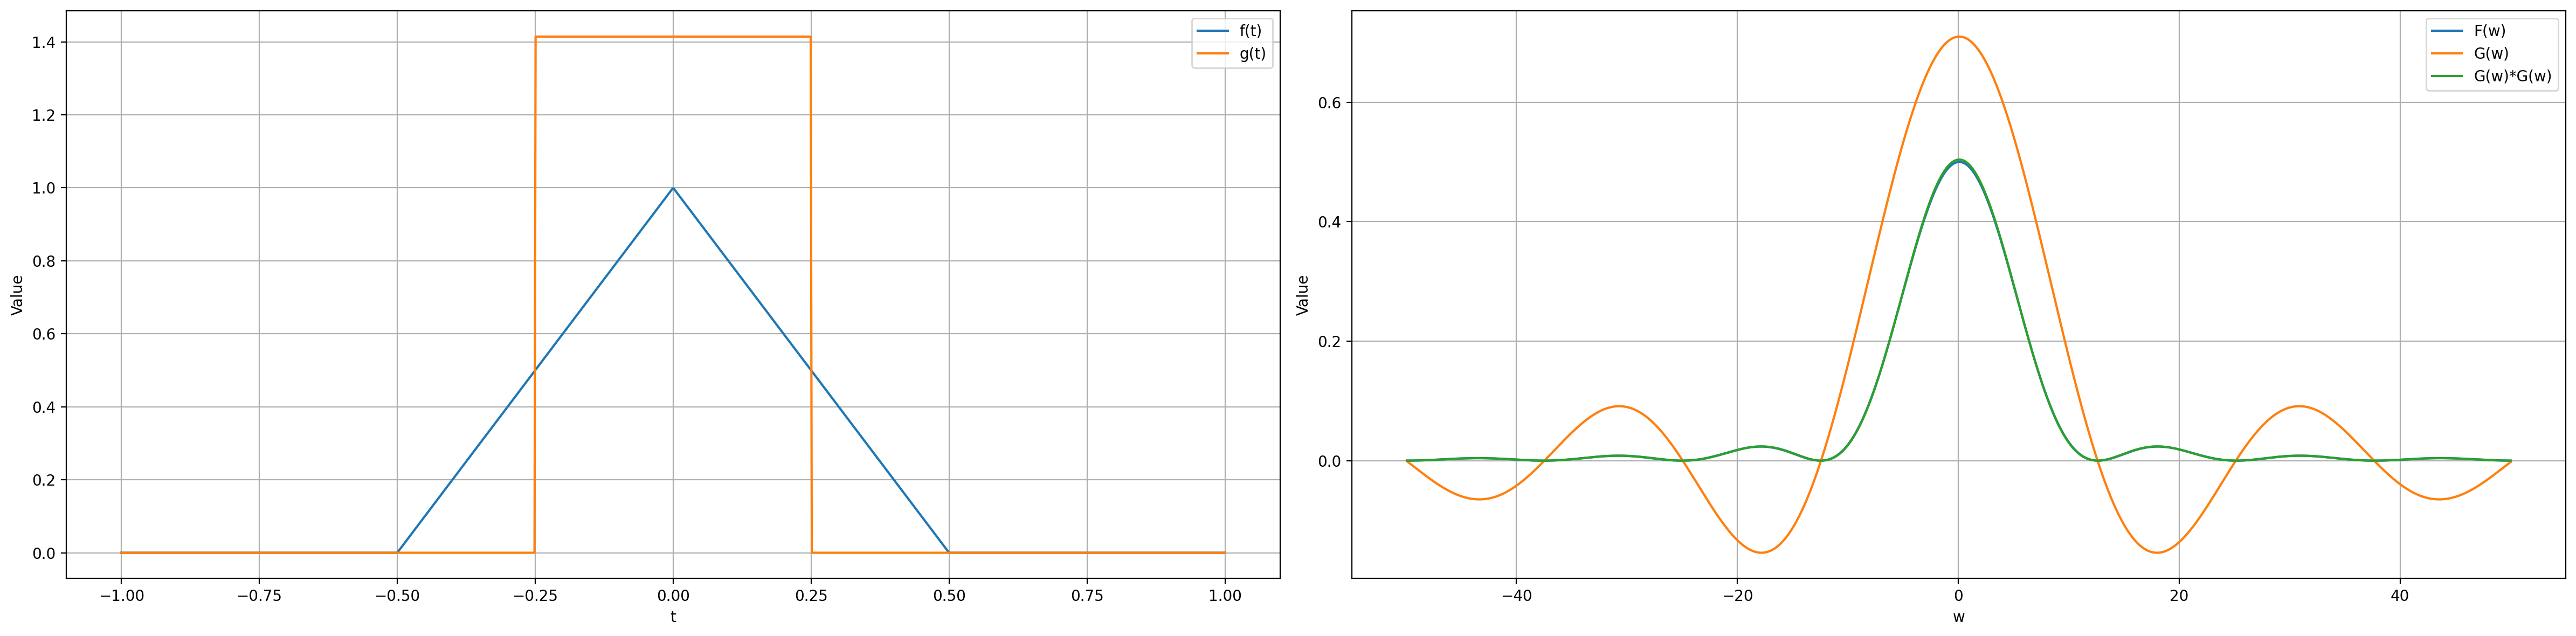

In [142]:
import numpy as np
import matplotlib.pyplot as plt

# 定义函数 f(t)
def f(t, tau, epsilon=1):
    return np.where(np.abs(t) <= tau/2, 1-2*np.abs(t), 0)

# 定义 g(t)（假设 g(t) 为三角脉冲函数）
def g(t):
    return np.where(np.abs(t) <= 0.25, np.sqrt(2), 0)

# 参数设置
tau = 1
E = 1
w1 = -50
w2 = 50
N = 1000
K = 1000
t2 = 1
t1 = -1
t_values = np.linspace(-1, 1, 1000)
w_values = []
import numpy as np
from cmath import exp as e

# 假设已经定义了 K、N、F、T、t、Δt、w1 和 Δw

# 初始化 F 数组
F = np.zeros((K, N), dtype=complex)
G = np.zeros((K, N), dtype=complex)
delta_t = (t2-t1)/N
delta_w = (w2-w1)/K
T = t2-t1
# 计算 F 数组
for k in range(1,K):
    for n in range(1,N):
        F[k, n] = F[k, n-1] + T / N * f(t1 + n*delta_t,tau) * np.exp(-1j * (w1 + k*delta_w) * (t1+ n*delta_t))
for k in range(1,K):
    for n in range(1,N):
        G[k, n] = G[k, n-1] + T / N * g(t1 + n*delta_t) * np.exp(-1j * (w1 + k*delta_w) * (t1+ n*delta_t))
for k in range(1,K+1):
    w_values.append (k * delta_w+w1)



k = np.linspace(-50, 50, 1000)

plt.figure(figsize=(24, 6),dpi=200)
plt.subplot(1, 2, 1)
plt.plot(t_values, f(t_values, tau), label='f(t)')
plt.plot(t_values, g(t_values), label='g(t)')
plt.xlabel('t')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

# 绘制 f(t) 和 g(t)
plt.subplot(1, 2, 2)
column_N = F[:, N-1]
column_N1 = G[:,N-1]
column_N2 = np.zeros(N)
for i in range(N):
    column_N2[i] = column_N1[i] * column_N1[i]
plt.plot(w_values, column_N, label='F(w)')
plt.plot(w_values, column_N1, label='G(w)')
plt.plot(w_values, column_N2, label='G(w)*G(w)')
plt.xlabel('w')
plt.ylabel('Value')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.savefig('convolution4.png')
plt.show()
